# Importation des Librairies

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd # data frame
import numpy as np # manipulate N-dimensional arrays
import matplotlib.pyplot as plt # data plotting
import seaborn as sns # data visualization 
import scipy # scientific computing library
%matplotlib inline

## Importation des librairies et de la base de données "Boston" pour la régression

In [4]:
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Préparation des données
* CRIM per capita crime rate by town
* ZN proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS proportion of non-retail business acres per town
* CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX nitric oxides concentration (parts per 10 million)
* RM average number of rooms per dwelling
* AGE proportion of owner-occupied units built prior to 1940
* DIS weighted distances to five Boston employment centres
* RAD index of accessibility to radial highways
* TAX full-value property-tax rate per  \$ 10,000
* PTRATIO pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
* LSTAT % lower status of the population
* MEDV Median value of owner-occupied homes in $1000’s

In [312]:
#X contient les données des variables explicatives, Y contient la variable cible (à prédire)
X = load_boston().data
Y = load_boston().target

In [313]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


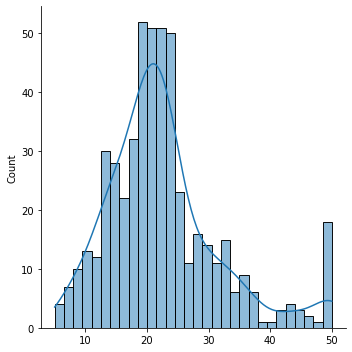

In [233]:
sns.displot(data=Y, bins=30,kde=True);

In [314]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

Utilisation de 'Standard Scalar Function' pour la standardisation des données, on va l'appliquer seulement sur les données d'apprentissage parce que nous ne voulons pas que notre modèle voie ces données avant, afin d’éviter un surajustement.

In [315]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Création des Dataframes avec Pandas

In [316]:
X_train = pd.DataFrame(data = X_train, columns=load_boston().feature_names)
X_train['Price'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns=load_boston().feature_names)
X_test['Price'] = list(y_test)

In [319]:
X_test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,-0.433904,0.920620,-1.332166,-0.30429,-0.706701,0.861042,0.049935,-0.302105,-0.304673,-1.100274,-0.023847,0.439877,-0.747356,28.2
1,-0.436711,1.856807,-1.098590,-0.30429,-0.604883,0.639842,-0.442468,0.892395,-0.532213,-0.229548,-0.396970,0.439877,-0.795511,23.9
2,-0.412765,-0.483661,-0.641657,-0.30429,-0.910337,-0.323027,0.588389,0.872388,-0.759754,-1.035558,-0.257049,0.393795,0.803261,16.6
3,-0.432897,0.048264,-0.764284,-0.30429,-1.241246,-0.542781,-1.682329,1.251250,-0.645983,-0.376630,0.209355,0.432234,-0.668930,22.0
4,-0.007602,-0.483661,0.991914,-0.30429,1.821781,-1.288788,0.967432,-0.807708,1.629421,1.511905,0.815679,0.261418,-0.381371,20.8


#### Implementation de SGD Regressor avec SKlearn

In [20]:
#Paramètres par défaut
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#### Comparaison des valeurs prédites avec les valeurs actuelles en utilisant la Racine de l'erreur quadratique moyenne

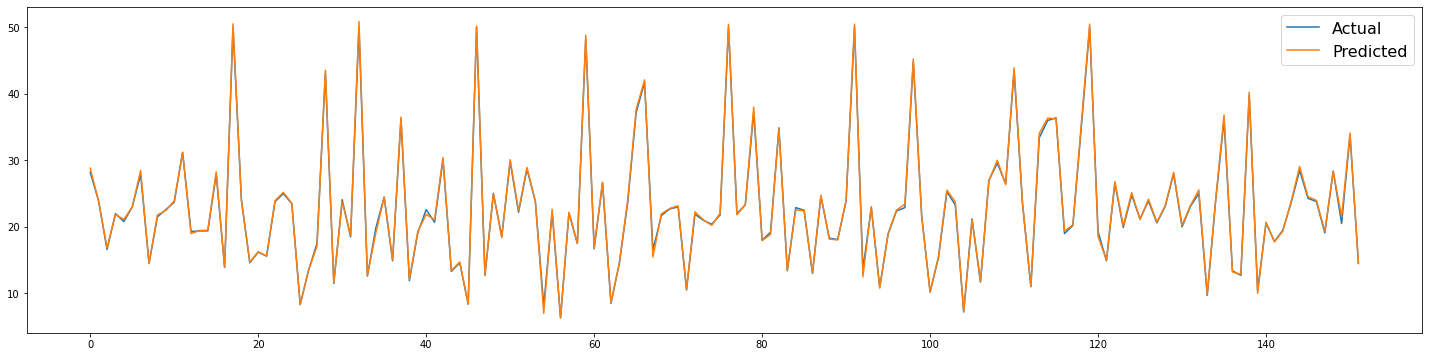

Mean Squared Error : 0.11597770755678957


In [21]:
#import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

#### Test du modèle pour différents paramètres (max_iter, tol, Shuffle)

In [154]:
#max_iter = 100
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=100, tol=1e-3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

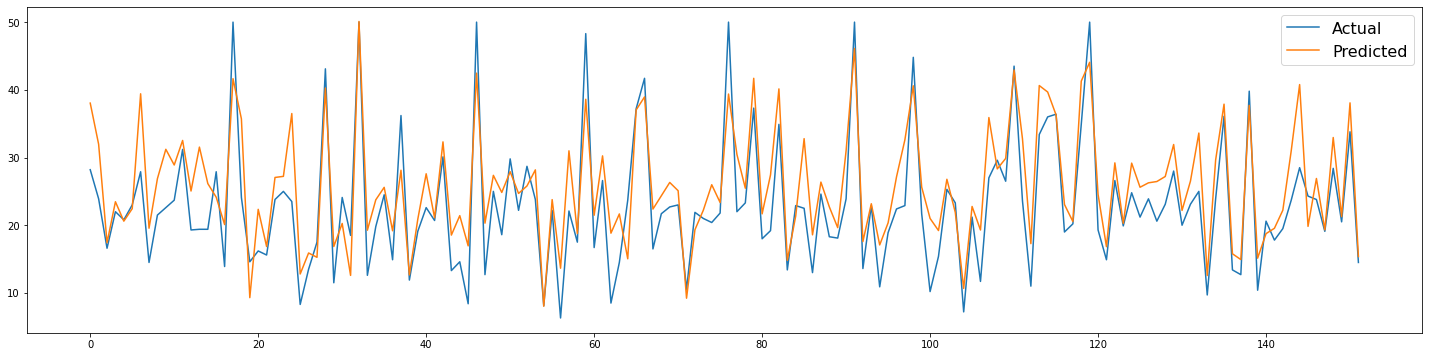

Mean Squared Error : 28.85930796836941


In [155]:
#import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

In [101]:
#max_iter = 10000
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=10000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

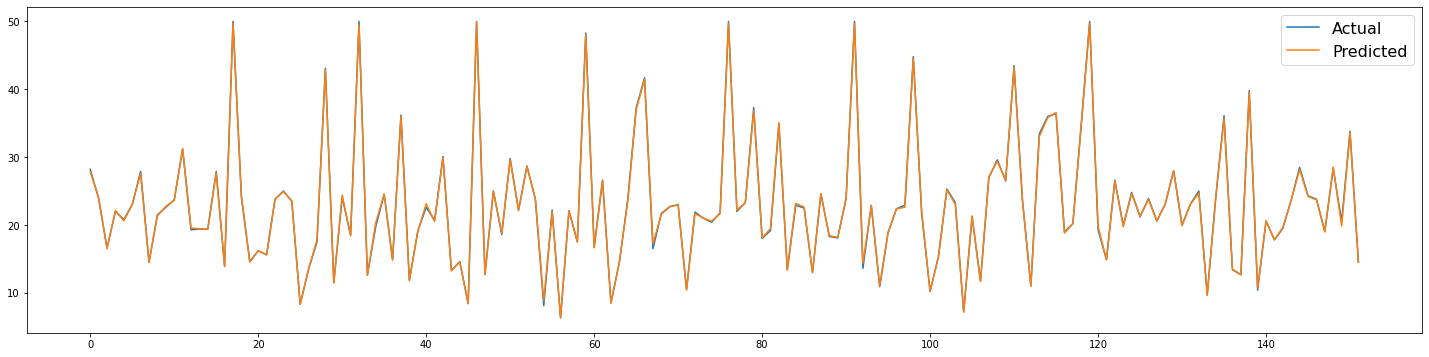

Mean Squared Error : 0.044691466311678696


In [90]:
#import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

In [91]:
#tol=0.1
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(tol=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

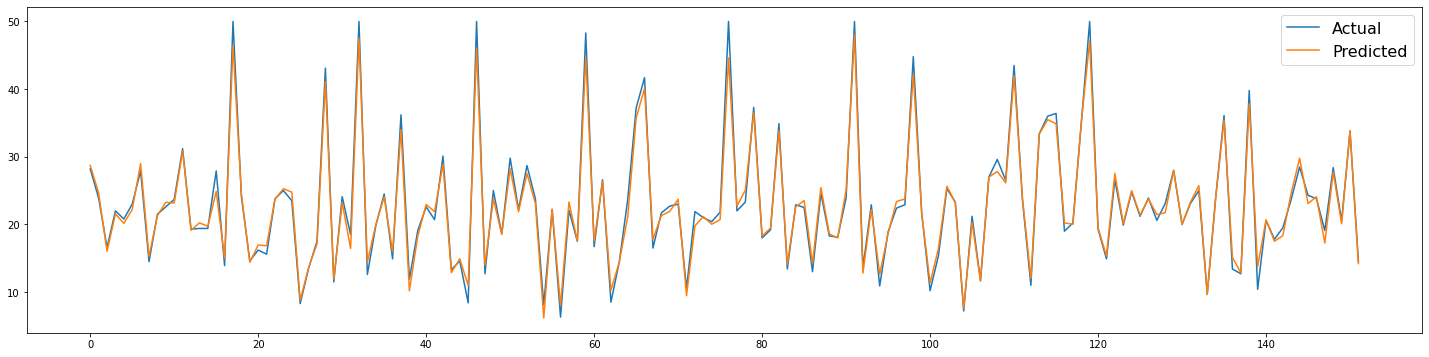

Mean Squared Error : 1.6579648071033777


In [92]:
#import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

In [99]:
#tol = 1e-6
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(tol=1e-6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

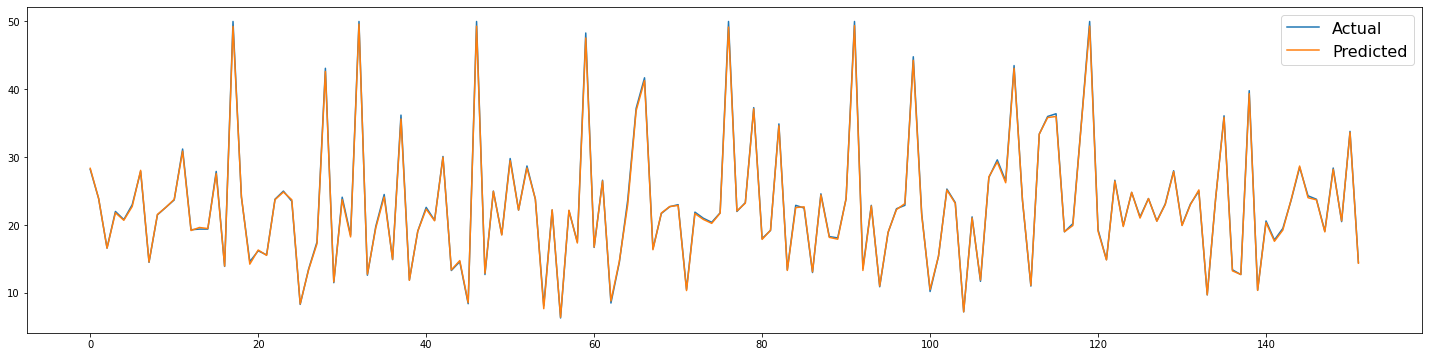

Mean Squared Error : 0.06010730210506279


In [100]:
#import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

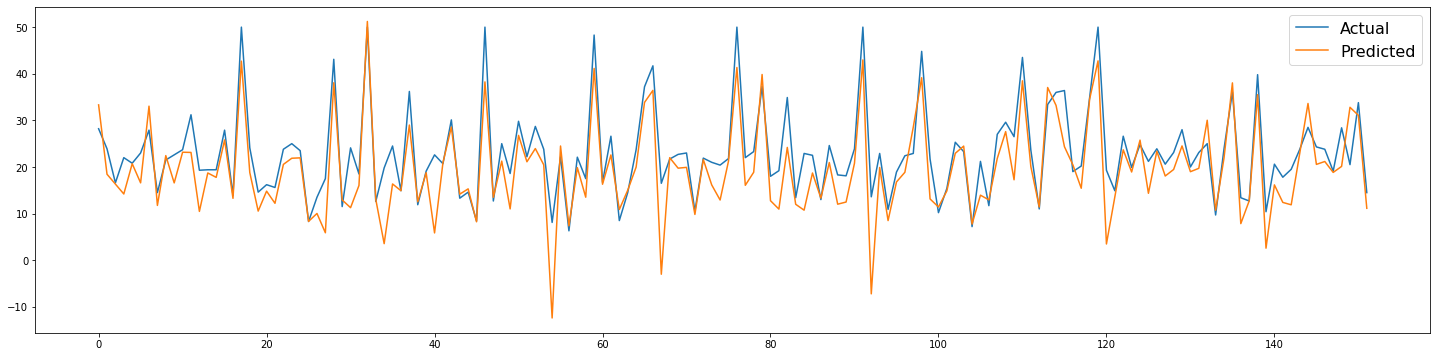

Mean Squared Error : 35.82553292683533


In [108]:
#tol = 0.1, max_iter = 100
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=100,tol=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

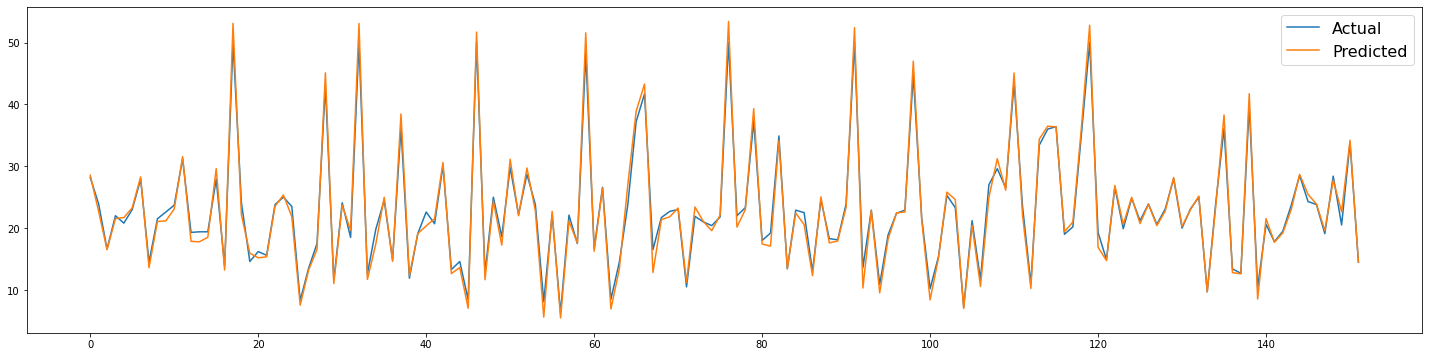

Mean Squared Error : 1.6503033157821114


In [109]:
#tol = 1e-6, max_iter = 100
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=100,tol=1e-6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

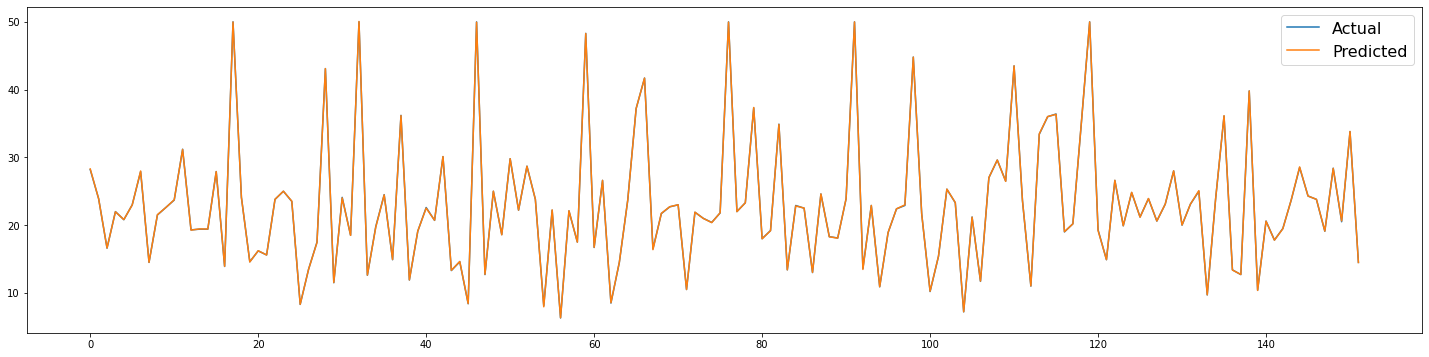

Mean Squared Error : 0.0016532357398691907


In [118]:
#tol = 1e-6, max_iter = 10000
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=10000,tol=1e-6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

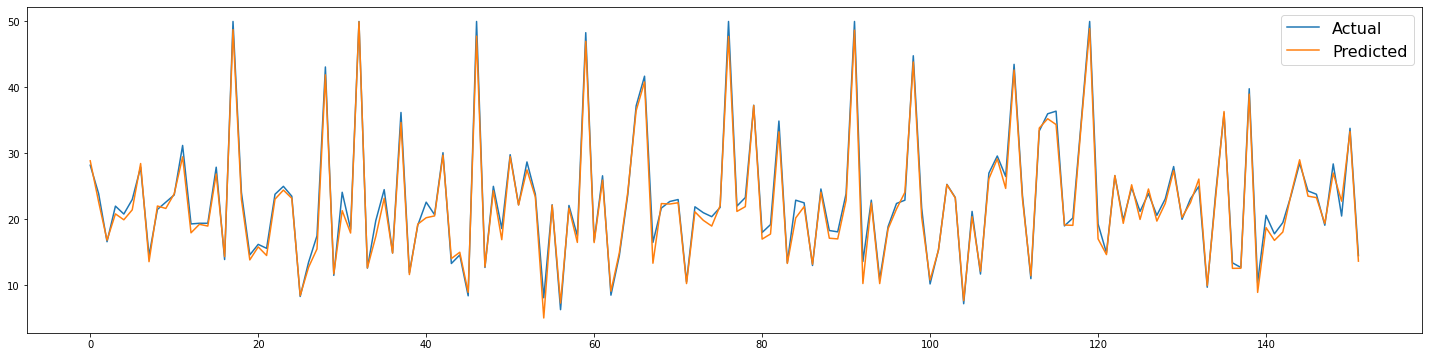

Mean Squared Error : 1.1872904359963474


In [120]:
#tol = 0.1, max_iter = 10000
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=10000,tol=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

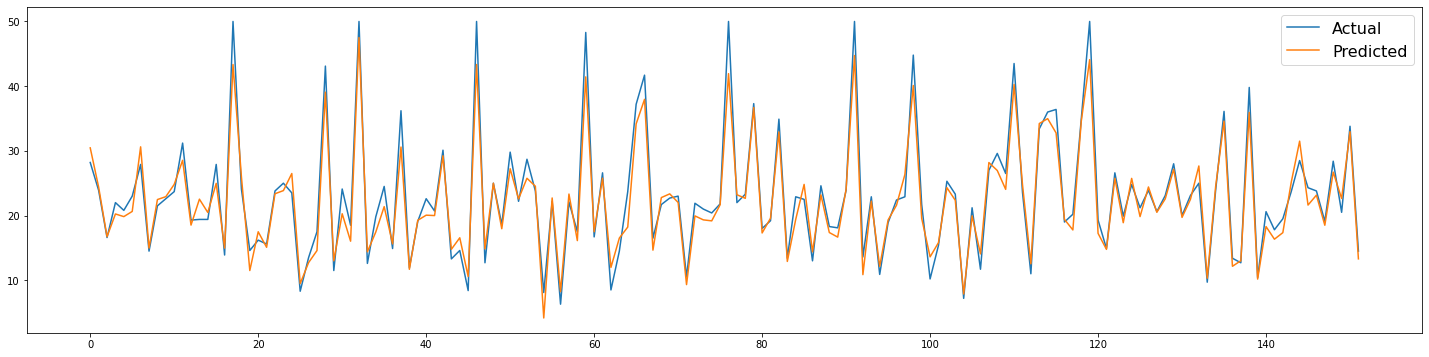

Mean Squared Error : 5.434899404508807


In [121]:
#Shuffle = False
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

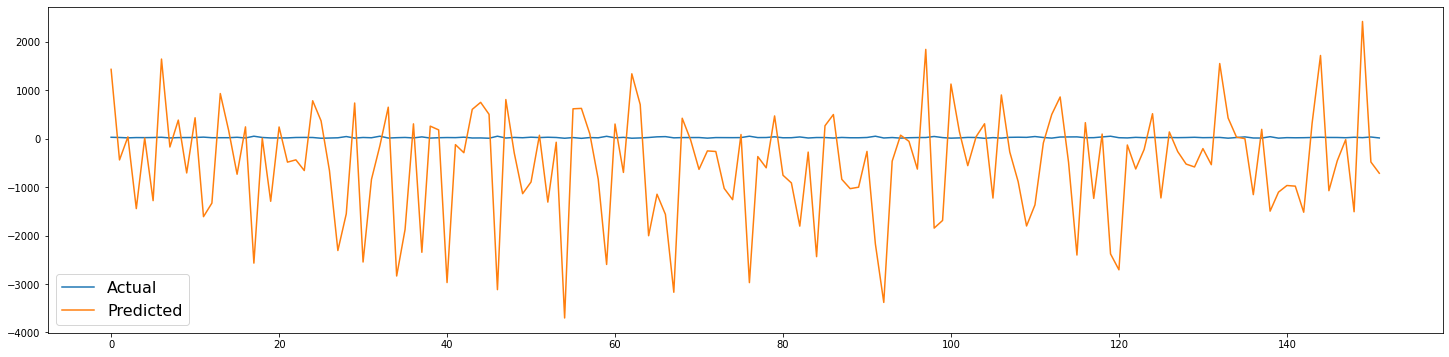

Mean Squared Error : 1605127.9251165218


In [131]:
#Shuffle = False, max_iter = 100
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=100,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

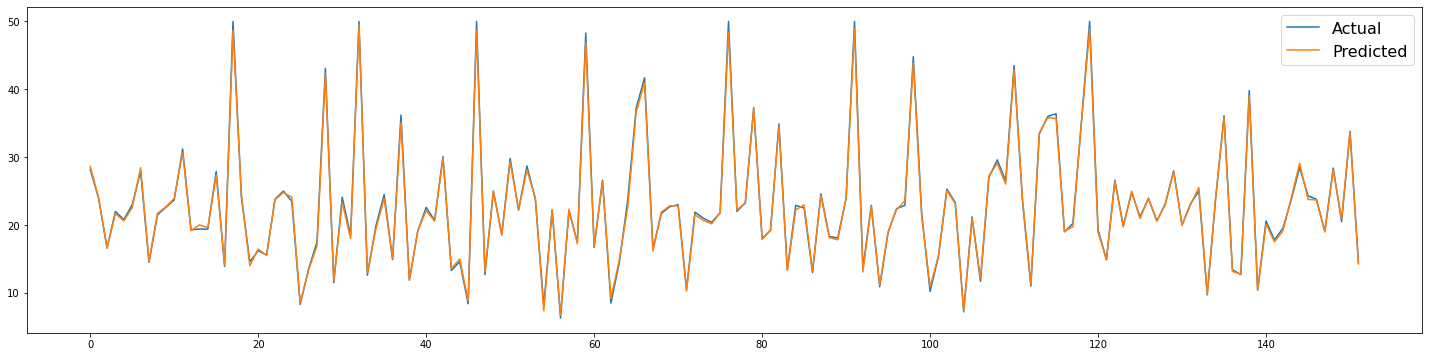

Mean Squared Error : 0.2044407657878348


In [132]:
#Shuffle = False, max_iter = 10000
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=10000,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

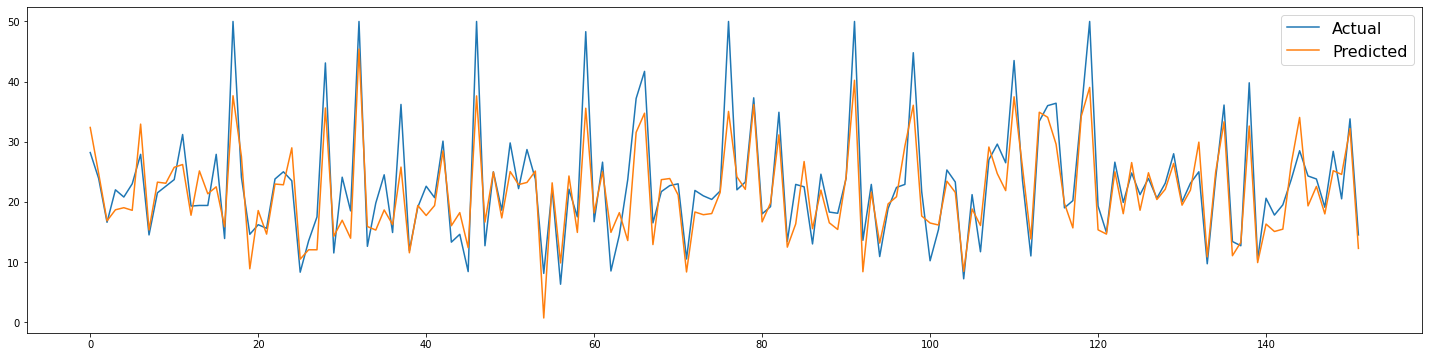

Mean Squared Error : 18.7931021819289


In [133]:
#Shuffle = False, tol = 0.1
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(tol=0.1,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

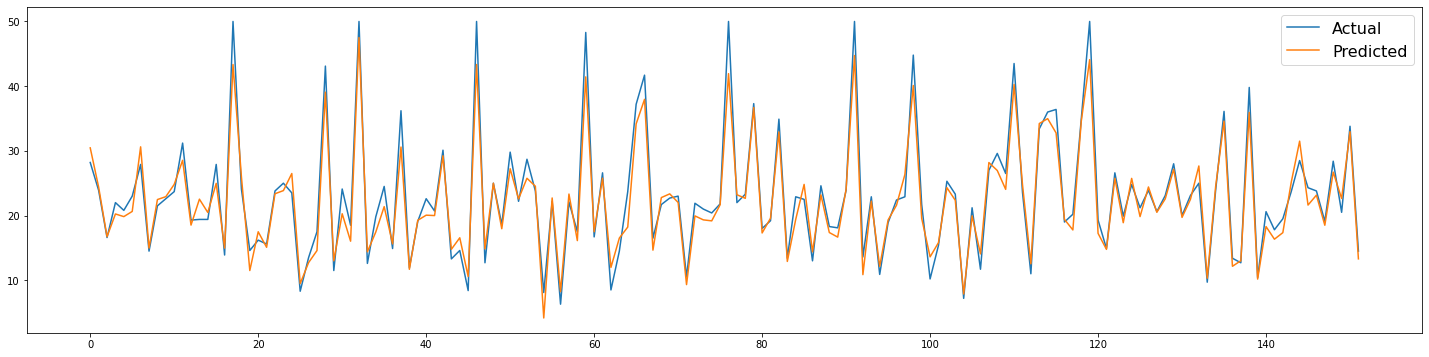

Mean Squared Error : 5.434899404508807


In [136]:
#Shuffle = False, tol=1e-6
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(tol=1e-6,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

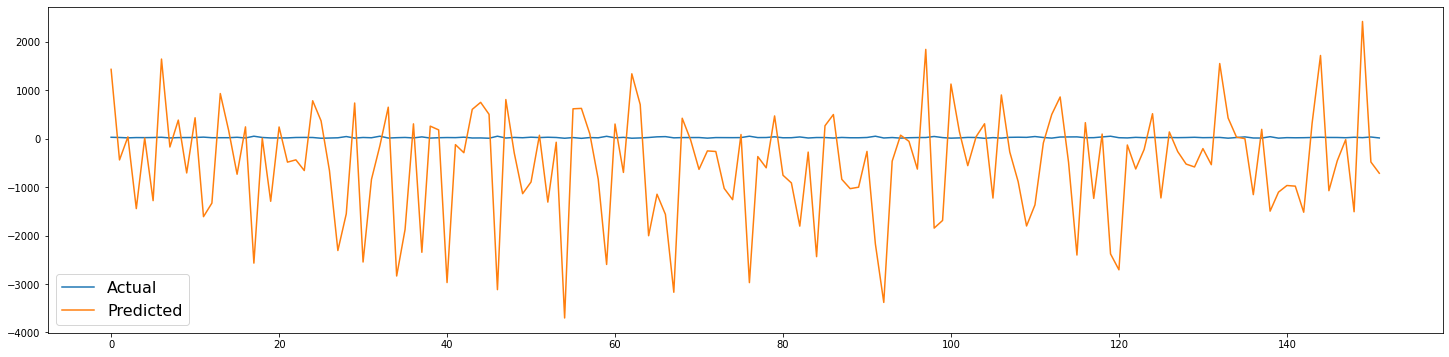

Mean Squared Error : 1605127.9251165218


In [139]:
#Shuffle = False, max_iter=100,tol=0.1
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=100,tol=0.1,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

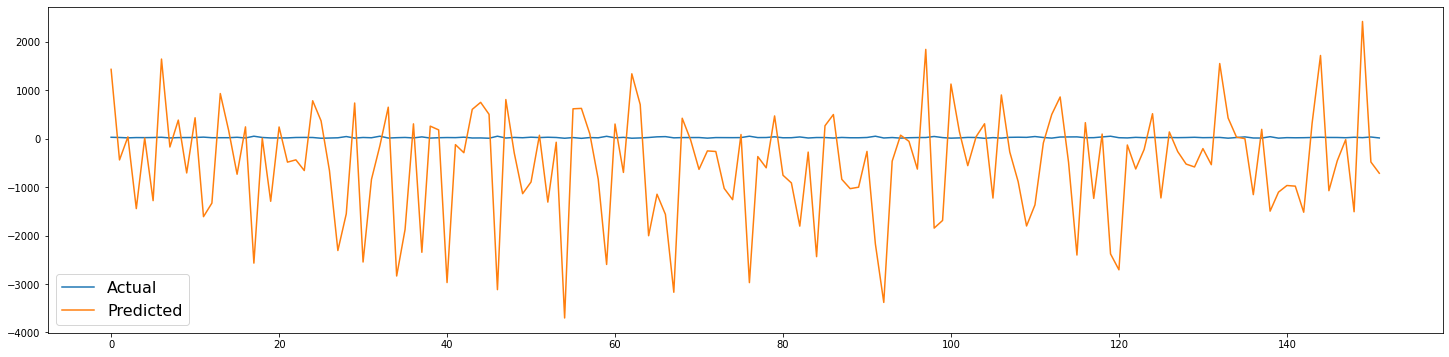

Mean Squared Error : 1605127.9251165218


In [140]:
#Shuffle = False, max_iter=100,tol=1e-6
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=100,tol=1e-6,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

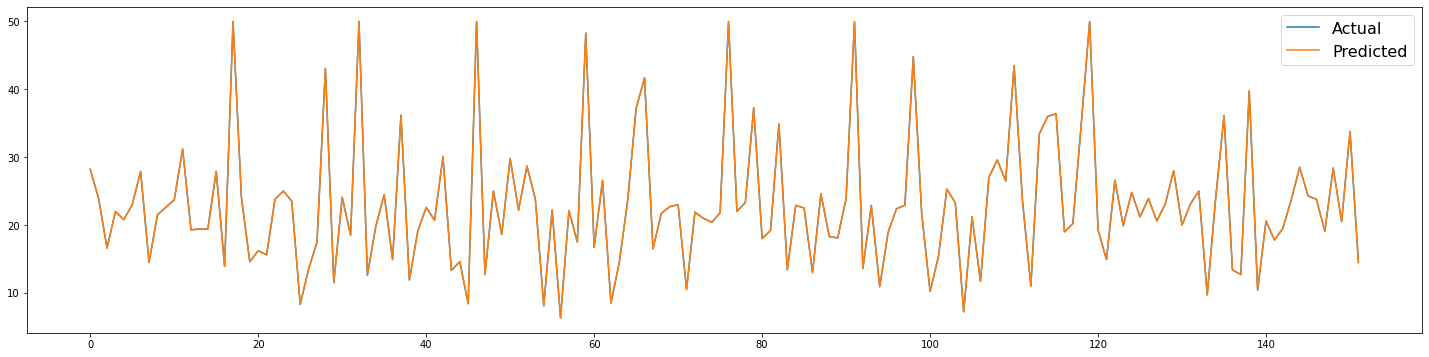

Mean Squared Error : 0.0002256665126896016


In [142]:
#Shuffle = False, max_iter=10000,tol=1e-6
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=10000,tol=1e-6,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

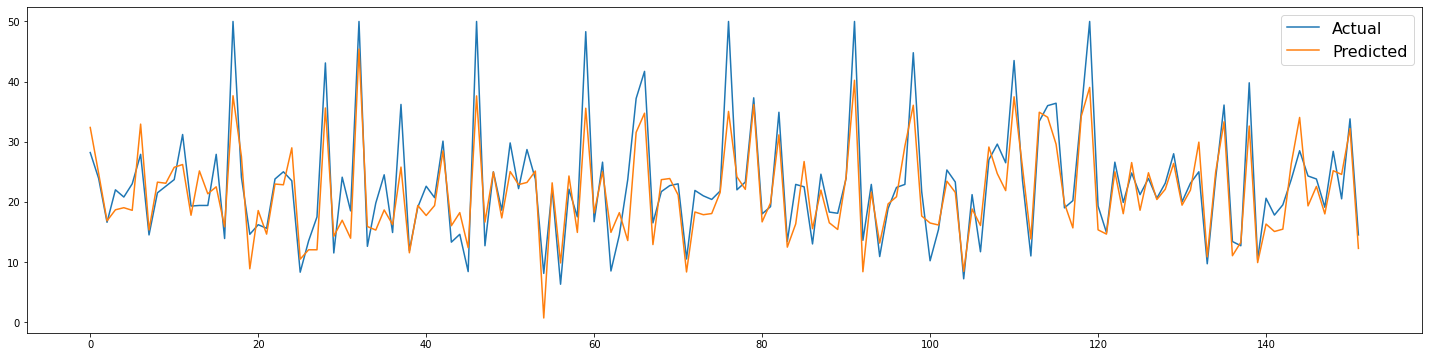

Mean Squared Error : 18.7931021819289


In [143]:
#Shuffle = False, max_iter=10000,tol=0.1
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=10000,tol=0.1,shuffle=False)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

### Importation de la base de données "Combined Cycle Power Plant" pour une deuxième régression

In [210]:
df = pd.read_csv('CCPP.csv', header = 0)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [211]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

### Characteristics of the data

1. Temperature (T) in the range 1.81°C and 37.11°C,
2. Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
3. Relative Humidity (RH) in the range 25.56% to 100.16%
4. Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
5. Net hourly electrical energy output (EP) 420.26-495.76 MW (target)

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

### Check the info() and describe() methods on the data.

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [6]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [190]:
X = df.drop("PE", axis =1)
Y = df["PE"]
X=X.to_numpy()
Y=Y.to_numpy()

In [191]:
# split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [163]:
X_test.shape

(4784, 4)

### Data Standardisation

In [192]:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [193]:
X_train = pd.DataFrame(data = X_train, columns = [["AT","V","AP","RH"]])
X_train['PE'] = list(y_train)  
X_test = pd.DataFrame(data = X_test, columns = [["AT","V","AP","RH"]])
X_test['PE'] = list(y_test)

In [194]:
X_train.head()

,AT,V,AP,RH,PE
0,-0.182709,0.606172,1.155644,0.351359,455.29
1,1.509216,0.789987,0.202447,-1.330486,439.84
2,0.142506,-0.242210,0.122589,1.059649,450.97
3,-0.089983,1.091634,-1.469470,0.884627,444.54
4,-1.948547,-0.843146,0.759753,0.369135,486.08


In [241]:
X_test.head()

,AT,V,AP,RH,PE
0,-0.256622,-0.837648,-0.757546,0.360931,458.92
1,1.329138,1.316298,-0.290293,-1.403639,430.55
2,-1.162386,-1.388310,1.444491,0.493564,473.85
3,1.390956,1.010724,0.758054,-1.342108,435.02
4,0.022902,-0.577634,-0.152665,1.283211,456.44


In [245]:
X_train.shape

(6697, 5)

#### Implementation de SGD Regressor sur la base "Combined Cycle Power Plant"


[6.80433583e+13 6.33270173e+13 7.02924191e+13 ... 7.14645536e+13
 6.43338407e+13 6.60973005e+13]


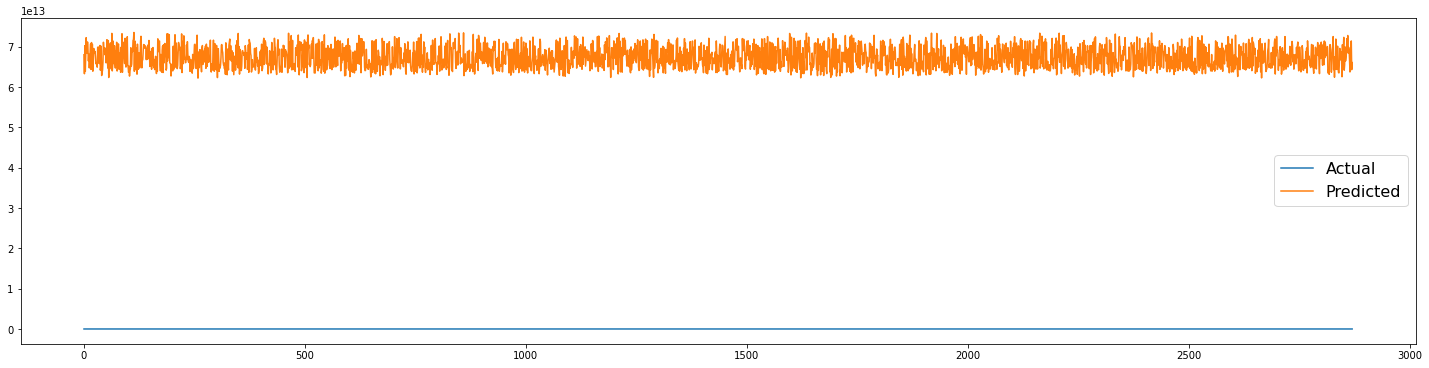

Mean Squared Error : 4.5437400725704915e+27


In [216]:
#Paramètres par défaut
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(y_pred)
#import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

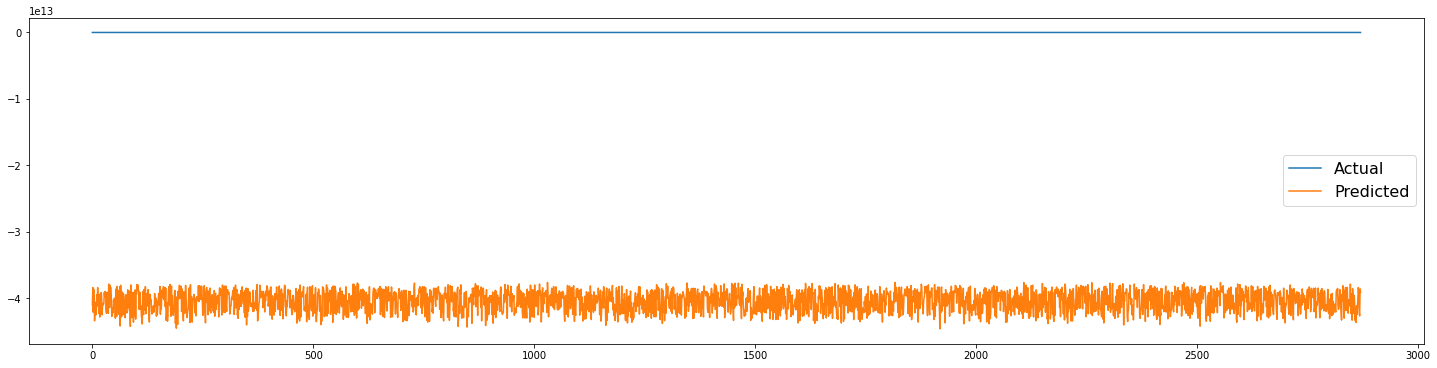

Mean Squared Error : 1.6374432629655515e+27


In [243]:
#max_iter=10000,tol=1e-6
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(max_iter=10000,tol=1e-6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

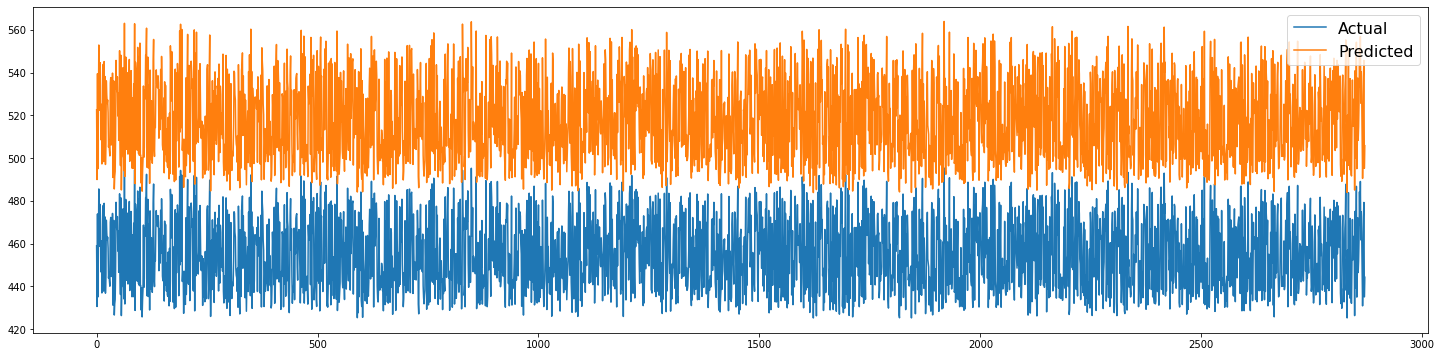

Mean Squared Error : 3965.2588907690774


In [229]:
#max_iter=10000,tol=1e-6, loss = 'epsilon_insensitive'
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(loss= 'epsilon_insensitive', max_iter=10000,tol=1e-6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

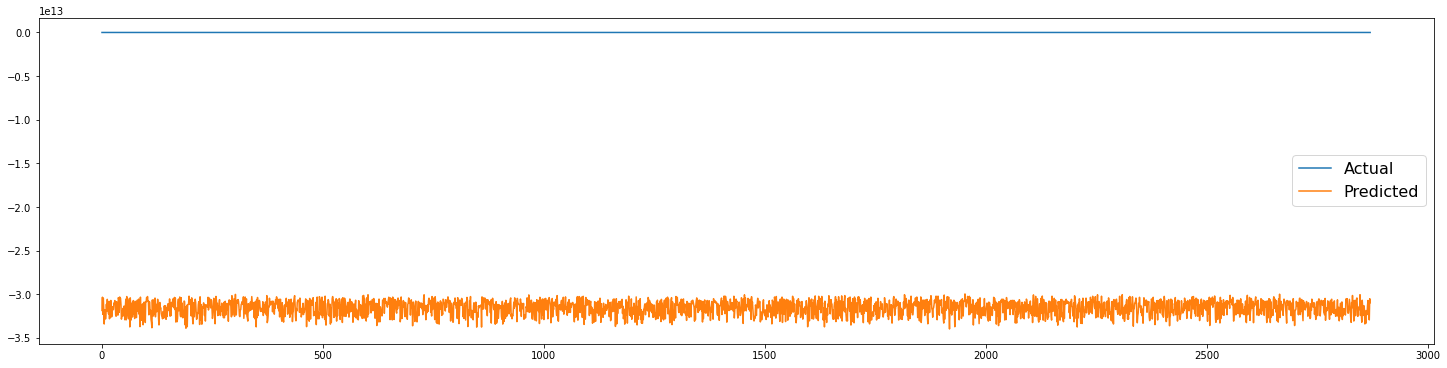

Mean Squared Error : 9.971687086955352e+26


In [231]:
#max_iter=10000,tol=1e-6, loss = 'squared_epsilon_insensitive'
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(loss= 'squared_epsilon_insensitive', max_iter=10000,tol=1e-6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))

#### Meilleure prédiction avec loss = 'Huber'

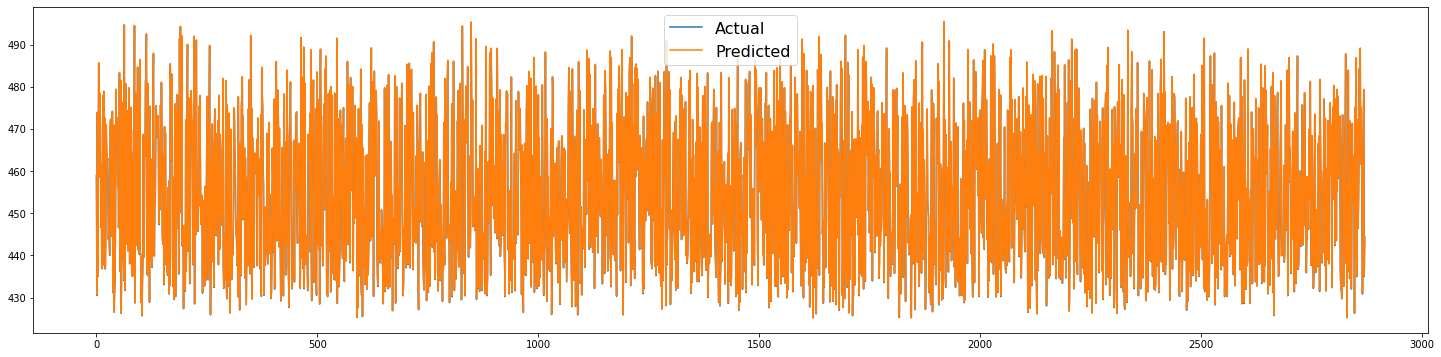

Mean Squared Error : 0.020971156673006395


In [226]:
#max_iter=10000,tol=1e-6, loss = 'Huber'
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(loss= 'huber', max_iter=10000,tol=1e-6)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from matplotlib.pyplot import figure
plt.figure(figsize=(25,6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend(prop={'size': 16})
plt.show()
print('Mean Squared Error :',mean_squared_error(y_test, y_pred))